In [72]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
#Load Restaurant data
zomatodata = pd.read_csv("zomato.csv", encoding='ISO-8859-1')
zomatodata.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [74]:
#Get country code 
countrycodes = pd.read_excel(open('Country-Code.xlsx', 'rb'))
countrycodes.head()
print(zomatodata.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [75]:
zomatodata = zomatodata.merge(countrycodes, how='inner', on='Country Code')
#zomatodata = zomatodata.join(countrycodes, on='Country Code', how='inner', lsuffix='l_', rsuffix='r_')

In [76]:
zomatodata.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [77]:
restaurantsIndia = zomatodata[(zomatodata['Country'] == 'India')]

<IPython.core.display.Javascript object>


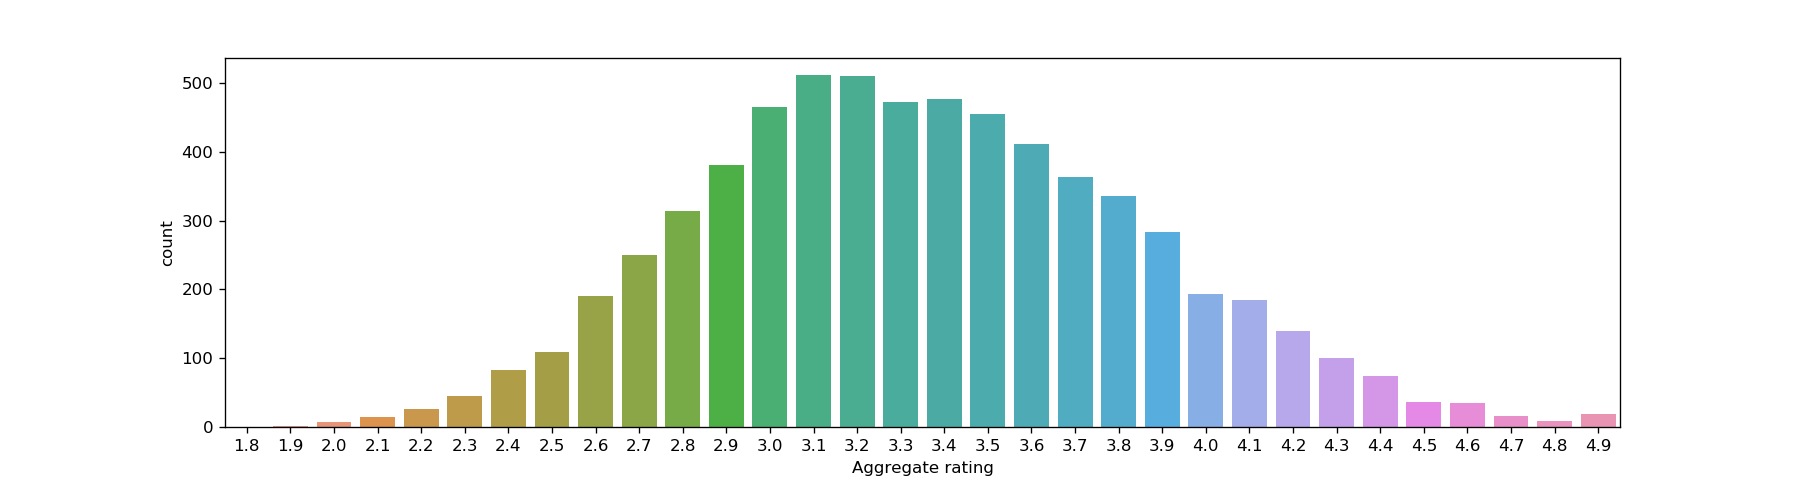

In [78]:
#restaurantsIndia['Aggregate rating']
f, ax = plt.subplots(1, 1, figsize= (15, 4))
ax = sns.countplot(restaurantsIndia[restaurantsIndia['Aggregate rating']!= 0]['Aggregate rating'])

In [144]:
cusines=dict()
for cuisine in restaurantsIndia['Cuisines'].tolist():
    for item in cuisine.split(','):
        item = item.strip()
        if item in cusines:
            cusines[item] += 1
        else:
            cusines[item] = 1
mostpoopularcusines = sorted(cusines.items(), key=lambda x: x[1], reverse=True)
mostpoopularcusines

[('North Indian', 3946),
 ('Chinese', 2690),
 ('Fast Food', 1963),
 ('Mughlai', 992),
 ('Bakery', 726),
 ('Continental', 724),
 ('Italian', 682),
 ('South Indian', 631),
 ('Cafe', 627),
 ('Desserts', 597),
 ('Street Food', 554),
 ('Mithai', 380),
 ('Pizza', 313),
 ('American', 225),
 ('Ice Cream', 216),
 ('Beverages', 216),
 ('Thai', 205),
 ('Asian', 186),
 ('Biryani', 175),
 ('Burger', 165),
 ('Healthy Food', 146),
 ('Mexican', 130),
 ('European', 119),
 ('Raw Meats', 114),
 ('Finger Food', 109),
 ('Salad', 92),
 ('Mediterranean', 90),
 ('Japanese', 82),
 ('Seafood', 81),
 ('Lebanese', 65),
 ('Tea', 44),
 ('Tibetan', 44),
 ('Bengali', 29),
 ('Juices', 26),
 ('Hyderabadi', 25),
 ('Kerala', 22),
 ('Sushi', 21),
 ('Rajasthani', 20),
 ('Arabian', 20),
 ('Kashmiri', 20),
 ('Goan', 19),
 ('Malaysian', 18),
 ('Modern Indian', 16),
 ('Tex-Mex', 16),
 ('Korean', 16),
 ('Vietnamese', 14),
 ('Lucknowi', 13),
 ('Middle Eastern', 13),
 ('French', 12),
 ('Gujarati', 11),
 ('Chettinad', 11),
 ('Awad

In [160]:
mostpoopularcusines = pd.DataFrame(mostpoopularcusines, columns=['Cusines', 'Count'])
mostpoopularcusines['Cusines'].values

array(['North Indian', 'Chinese', 'Fast Food', 'Mughlai', 'Bakery',
       'Continental', 'Italian', 'South Indian', 'Cafe', 'Desserts',
       'Street Food', 'Mithai', 'Pizza', 'American', 'Ice Cream',
       'Beverages', 'Thai', 'Asian', 'Biryani', 'Burger', 'Healthy Food',
       'Mexican', 'European', 'Raw Meats', 'Finger Food', 'Salad',
       'Mediterranean', 'Japanese', 'Seafood', 'Lebanese', 'Tea',
       'Tibetan', 'Bengali', 'Juices', 'Hyderabadi', 'Kerala', 'Sushi',
       'Rajasthani', 'Arabian', 'Kashmiri', 'Goan', 'Malaysian',
       'Modern Indian', 'Tex-Mex', 'Korean', 'Vietnamese', 'Lucknowi',
       'Middle Eastern', 'French', 'Gujarati', 'Chettinad', 'Awadhi',
       'Afghani', 'Maharashtrian', 'Burmese', 'Andhra', 'Nepalese',
       'Parsi', 'North Eastern', 'Turkish', 'Naga', 'Spanish', 'Indian',
       'Portuguese', 'Bihari', 'Indonesian', 'Greek', 'African',
       'Moroccan', 'Charcoal Grill', 'Assamese', 'Mangalorean',
       'Armenian', 'Iranian', 'British', '

<IPython.core.display.Javascript object>


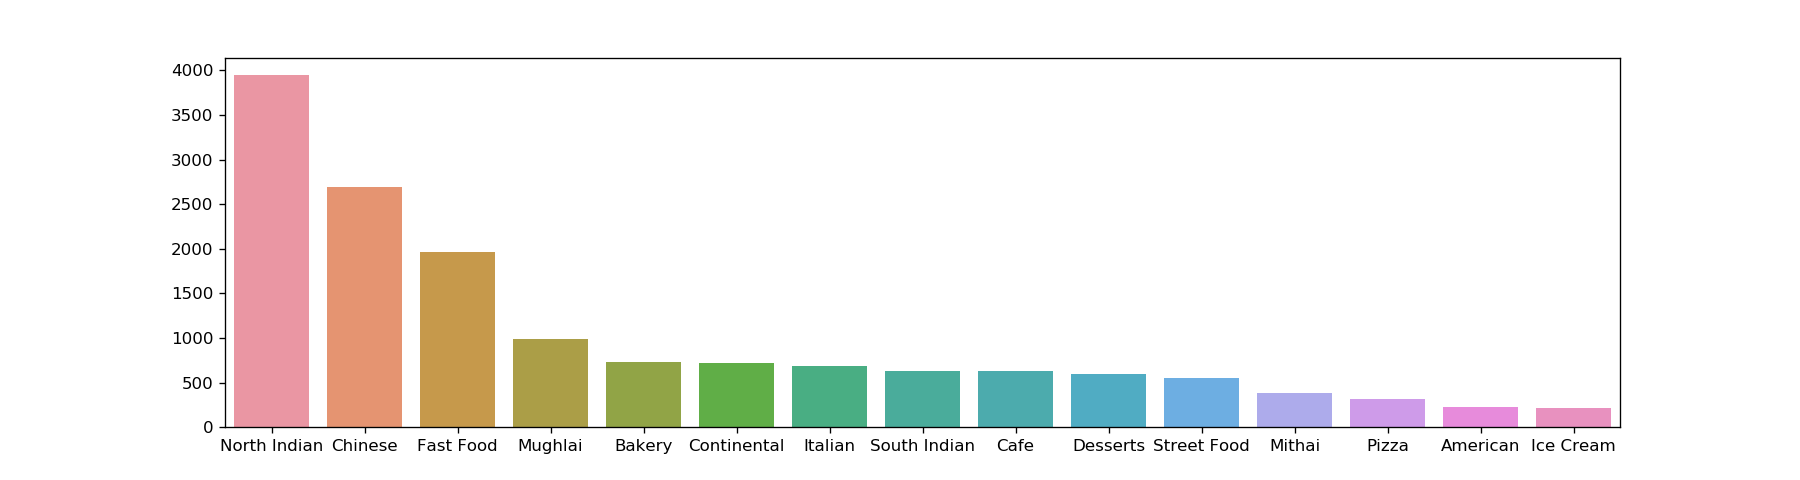

In [169]:
f, ax = plt.subplots(1, 1, figsize=(15, 4))
ax = sns.barplot(mostpoopularcusines['Cusines'][:15].values, mostpoopularcusines['Count'][:15].values)

In [175]:
#Locality which has highest number of restaurants
restaurantsIndia[restaurantsIndia['City'] == 'Hyderabad']['Locality'].value_counts()

Jubilee Hills                          7
Banjara Hills                          2
Madhapur                               2
Hitech City                            2
12th Square Building, Banjara Hills    1
Holiday Inn Express & Suites           1
Gachibowli                             1
Kondapur                               1
Ohri' Hitech City                      1
Name: Locality, dtype: int64

<IPython.core.display.Javascript object>


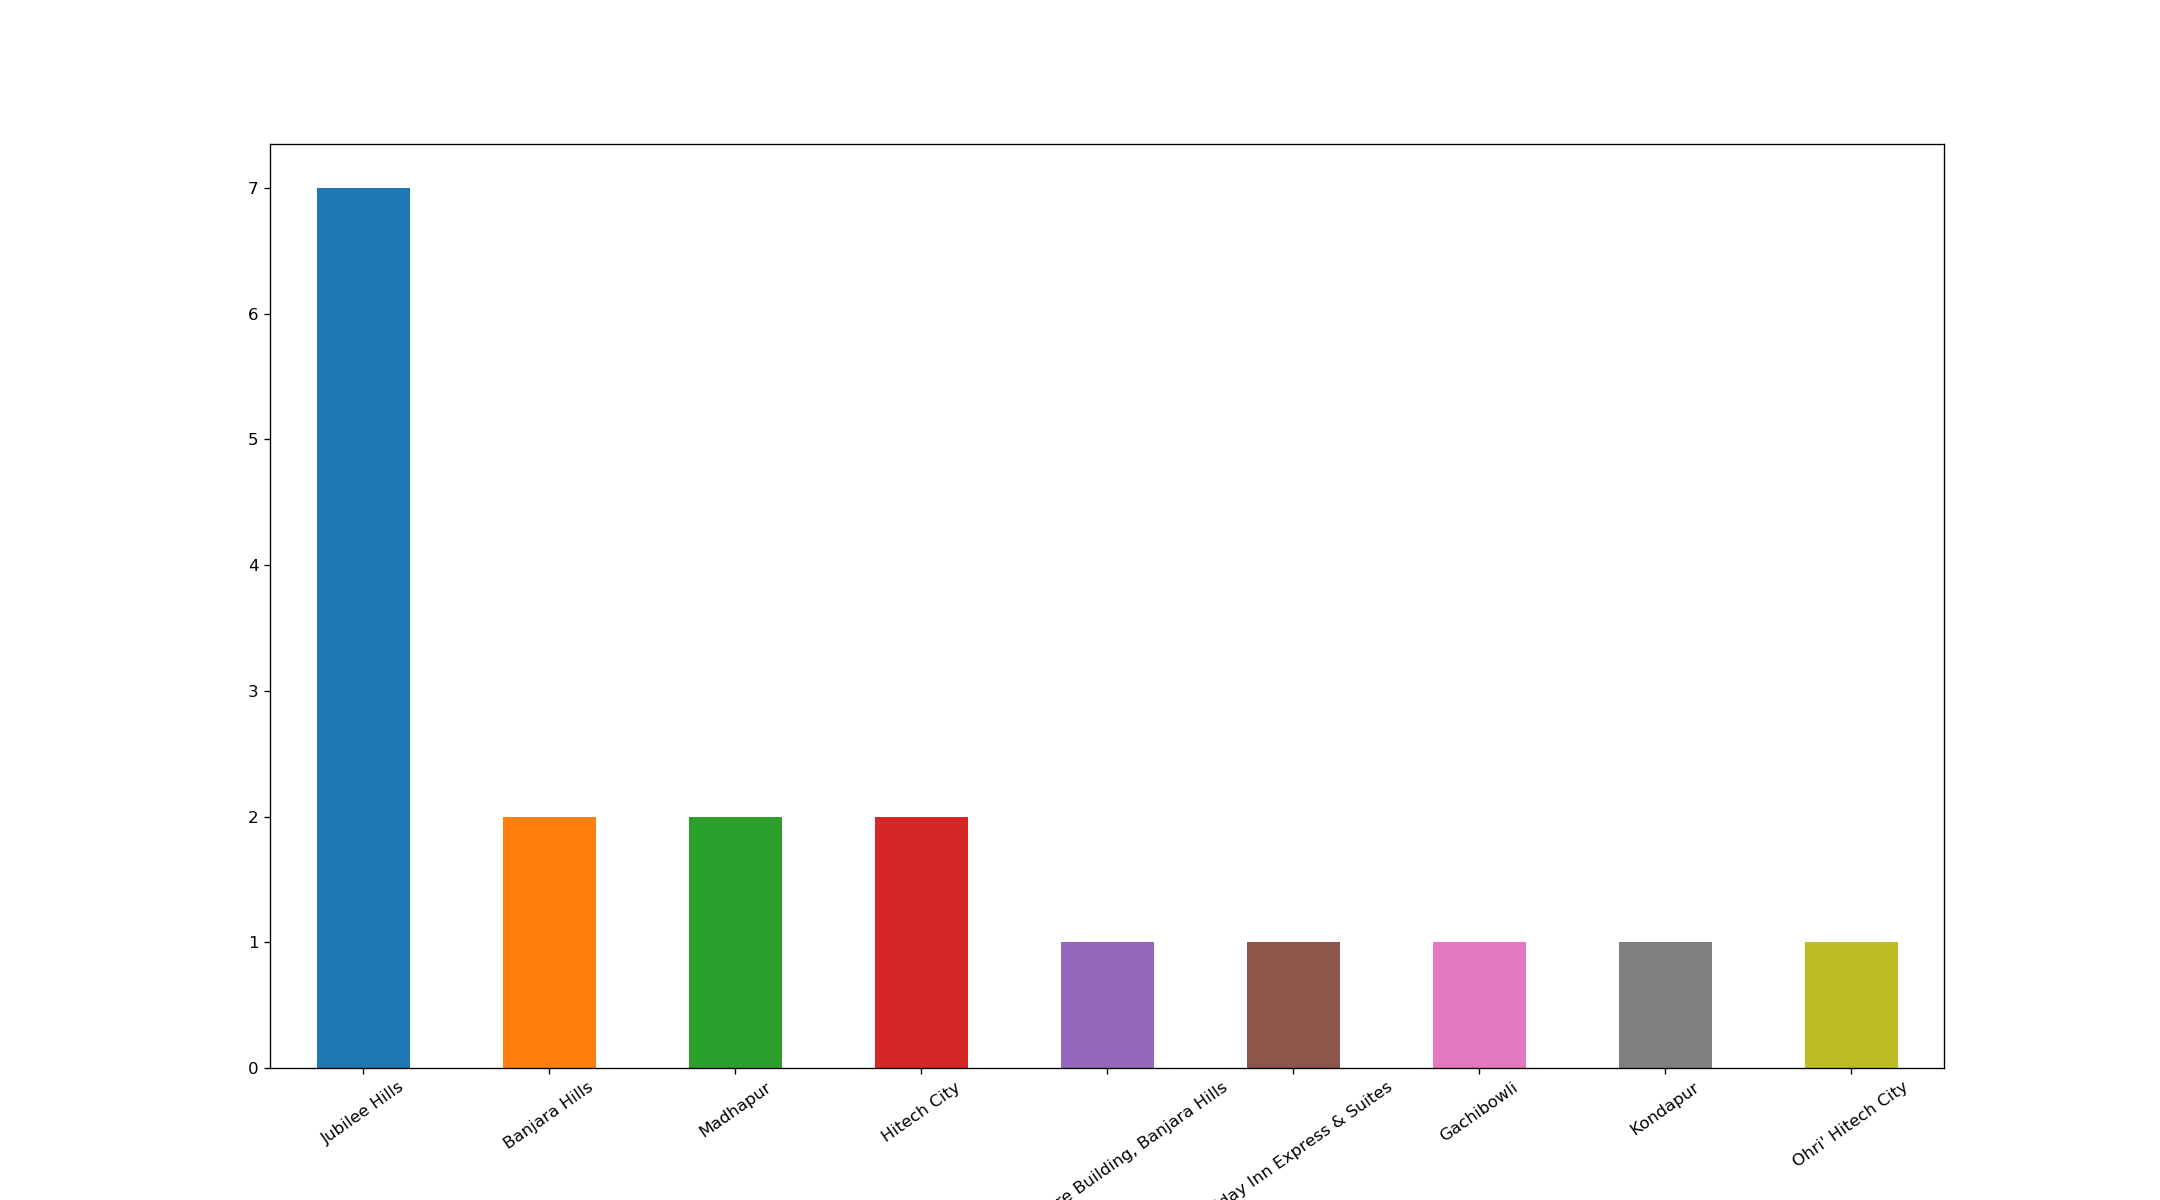

In [184]:
f, ax = plt.subplots(1, 1, figsize=(18, 8))
restaurantsIndia[restaurantsIndia['City'] == 'Hyderabad']['Locality'].value_counts().plot(kind='bar', rot=35);

In [226]:
## City with
citiWithRestaurantCount = restaurantsIndia.agg('City').value_counts()

<IPython.core.display.Javascript object>


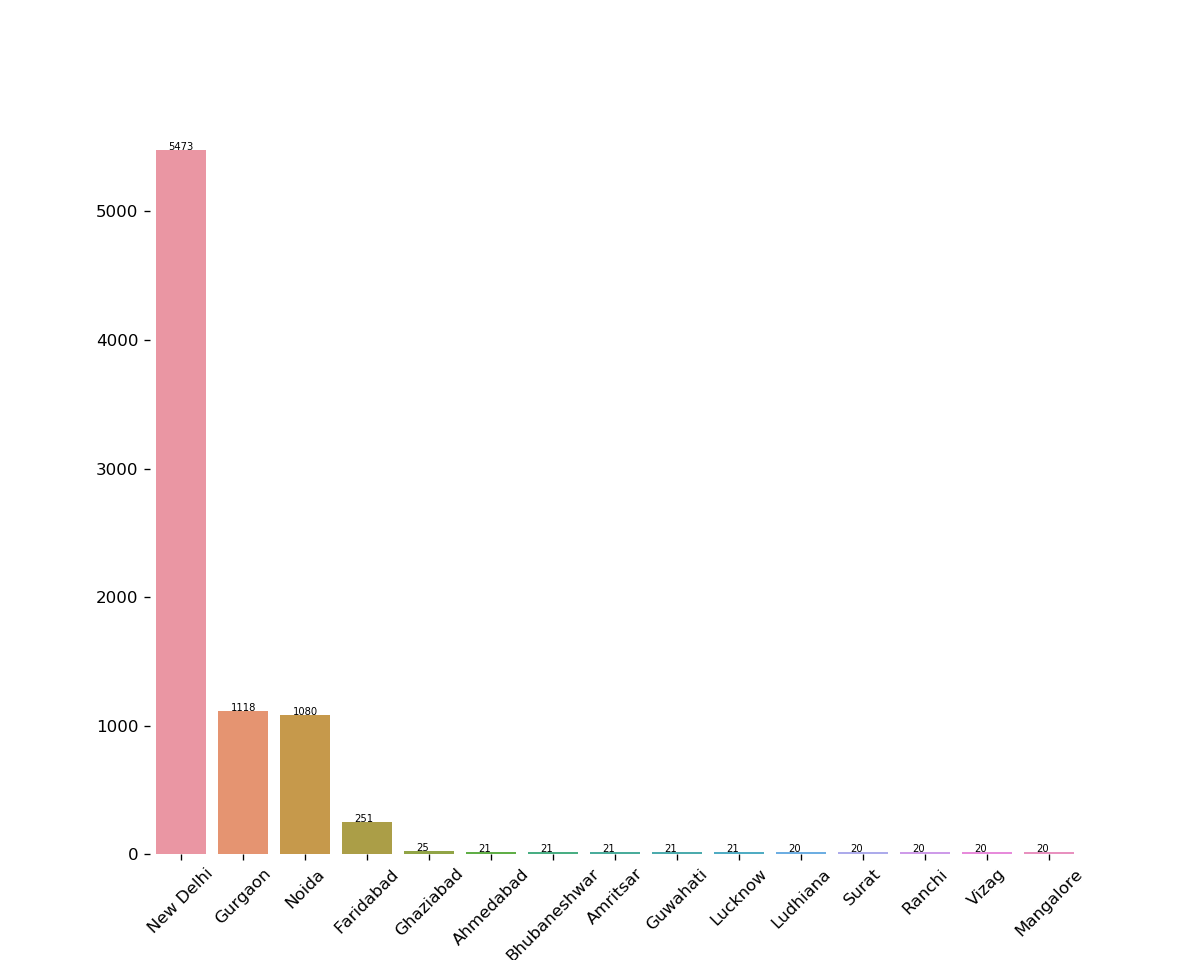

In [242]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))
cities = sns.barplot(citiWithRestaurantCount.index.values[:15], citiWithRestaurantCount.values[:15])
cities.set_xticklabels(cities.get_xticklabels(), rotation=45);

In [243]:
xpos = [ticklable.get_position()[0] + 1 for ticklable in cities.get_xticklabels()]

In [244]:
ypos = list(citiWithRestaurantCount.values[:15])

In [245]:
for i in range(len(xpos)):
    plt.text(x = xpos[i]-1.2 , y = ypos[i]+0.1, s = ypos[i], size = 6)

In [246]:
plt.box(None)
plt.